In [73]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [74]:
import pandas as pd
import numpy as np
%matplotlib inline

In [75]:
dataset = pd.read_csv('TSLA.csv')

In [76]:
dataset.shape

(1640, 7)

In [77]:
dataset.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-06-29,5.000,3.508,3.800,4.778,93831500,4.778
1,2010-06-30,6.084,4.660,5.158,4.766,85935500,4.766
2,2010-07-01,5.184,4.054,5.000,4.392,41094000,4.392
3,2010-07-02,4.620,3.742,4.600,3.840,25699000,3.840
4,2010-07-06,4.000,3.166,4.000,3.222,34334500,3.222


In [78]:
dataset.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1640.000000,1640.000000,1640.000000,1640.000000,1.640000e+03,1640.000000
mean,26.198037,25.252948,25.740117,25.731901,2.118811e+07,25.731901
std,18.947568,18.368534,18.669071,18.663112,2.169151e+07,18.663112
min,3.326000,2.996000,3.228000,3.160000,5.925000e+05,3.160000
25%,6.049500,5.780500,5.948500,5.908000,5.800500e+06,5.908000
50%,30.071000,28.543000,29.567000,29.485000,1.550400e+07,29.485000
75%,44.165000,42.721501,43.473501,43.532499,2.810162e+07,43.532499
max,58.284000,56.080002,57.534000,57.208000,1.858195e+08,57.208000


In [115]:
x = preprocessing.scale(dataset[['High','Low','Open','Volume']].values)
#x = dataset[['High','Low','Open','Volume']].values
y = dataset['Close'].values

In [116]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [117]:
print('Is data split?:', len(x_train) + len(x_test) == dataset.shape[0])

Is data split?: True


In [118]:
print('Regressor Intercept:',regressor.intercept_)
print('Regressor Coefficients:',regressor.coef_)

Regressor Intercept: 25.732247475458433
Regressor Coefficients: [ 15.55938943  13.28120372 -10.17181113  -0.02725897]


In [108]:
predicted = regressor.predict(x_test)
print(predicted)

[40.90775456 49.35472102 41.72244739 37.96237376  5.8976462  44.63754314
  8.97774401 40.53855151 45.36602283 40.79113441  5.69940539 46.36065725
  6.06156632  5.69330125  6.11301144  6.88051575  7.22163962  6.65660548
 46.54103952  6.94857428 44.76703555 11.19904637 44.05781344 52.73587168
  4.27849367 45.81119676 47.22305485 41.99914635 28.89416098  6.04789397
  4.92563444 41.35494181 43.35562652 50.44922085  4.89875845 39.88367341
 44.07250009 33.273995   36.90759778 50.3954896  34.90691734  6.6437258
  4.57352357 41.16139937 29.89579829  5.69201467  7.03873082 24.58596655
 45.59397861  4.15399835  6.05125224  4.09998078  5.70091932  5.78346552
  5.8323792   7.0139033   4.53705393 41.16709942 50.18088674 51.08769667
 30.83419872 50.63598495  4.12247073 35.32081497  6.45855426 49.85860133
  4.0871649   6.50838387 41.42047101 54.01800254  6.71809191  6.41924262
 41.39187681 20.14656752 52.83087302 43.75831947 41.65629071 51.77071291
  5.81734259  9.02205545 49.76226497  6.74589483 50.

In [109]:
dframe = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predicted.flatten()})

In [110]:
dframe.head(10)

,Actual,Predicted
0,41.285999,40.907755
1,49.113998,49.354721
2,42.048000,41.722447
3,37.754002,37.962374
4,5.822000,5.897646
5,44.646000,44.637543
6,8.868000,8.977744
7,40.341999,40.538552
8,45.130001,45.366023
9,41.284000,40.791134


In [111]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Square Error:', (metrics.mean_squared_error(y_test,predicted))**0.5)

Mean Absolute Error: 0.20391980233154822
Mean Squared Error: 0.09177485099412136
Root Mean Square Error: 0.3029436432640919


In [112]:
graph = dframe.head(20)

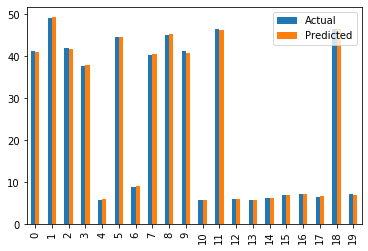

In [113]:
graph.plot(kind='bar');

In [114]:
accuracy = regressor.score(x_test, y_test)
print("Linear Regression Accuracy : ", accuracy)

Linear Regression Accuracy :  0.9997421847602063


In [63]:
time_series_pred = pd.read_csv('TSLA_Test.csv')

In [119]:
time_series_pred['Close']
days_out = time_series_pred.shape[0]
x_out = x[-days_out:]
y_out = y[:-days_out]

In [120]:
regressor.predict(x_out)

array([41.97933469, 40.4147001 , 39.46874833, 40.45335243, 39.8910641 ,
       40.57263515, 39.64134163, 39.59132277, 38.86160555, 39.32975789,
       40.78830816, 39.79355085, 40.00776957, 40.54918451, 40.60299789,
       40.38452051, 41.16139937, 40.37688686, 39.49245768, 38.19331505,
       38.04223599, 37.89668829, 38.05172698, 38.28740722, 38.97013859,
       37.73317753, 36.71288064, 37.39725096, 36.17201107, 37.01701707,
       36.6333326 , 37.44482804, 37.6570258 , 37.51331028, 37.74090095,
       38.67571143, 39.2953573 , 39.55947121, 38.39039484, 37.80860139,
       36.60619337, 36.45405572, 37.51606289, 36.8373326 , 38.21167432,
       38.09167499, 38.62711441, 38.56732665, 39.88861652, 40.1258267 ,
       39.88749579, 40.25414611, 40.40497489, 41.46866403, 42.11767722,
       41.65629071, 42.41393003, 44.07250009, 44.01781474, 43.13865938,
       42.74901114])

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-01-03,44.066002,42.192001,42.972000,43.397999,29616500,43.397999
1,2017-01-04,45.599998,42.862000,42.950001,45.397999,56067500,45.397999
2,2017-01-05,45.495998,44.389999,45.284000,45.349998,29558500,45.349998
3,2017-01-06,46.062000,45.090000,45.386002,45.801998,27639500,45.801998
4,2017-01-09,46.383999,45.599998,45.793999,46.256001,19897500,46.256001
